<a href="https://colab.research.google.com/github/aryalal11/Topsis_Pretrained/blob/main/topsis_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda

Generating response for BlenderBot...


Device set to use cuda
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



Generating response for DialoGPT...


Device set to use cuda
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generating response for Falcon-RW...


Device set to use cuda
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



Generated Responses: {'BlenderBot': 'Briefly list the key future applications of AI in different sectors.   ', 'DialoGPT': 'Briefly list the key future applications of AI in different sectors.This is a good example of a future where we are not just a few years away from AI.', 'Falcon-RW': 'Briefly list the key future applications of AI in different sectors.\n- Healthcare\n- Education\n- Transportation\n- Manufacturing\n- Retail\n- Financial Services\n- Government\n- Media\n- Entertainment\n- Sports\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n- Agriculture\n'}

Evaluating response from BlenderBot...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Evaluating response from DialoGPT...

Evaluating response from Falcon-RW...

Final Model Ranking:
        Model      BLEU     ROUGE  BERTScore   Latency  TOPSIS_Score  Rank
0  BlenderBot  0.136744  0.100000   0.888196  0.628684      0.861558   1.0
2   Falcon-RW  0.022851  0.122449   0.808669  1.320975      0.352133   2.0
1    DialoGPT  0.049717  0.051282   0.866913  0.742746      0.231925   3.0

Results saved as 'model_evaluation_results.csv'.


<ipython-input-4-3050a4893f46>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="BLEU", data=df, palette="Blues")


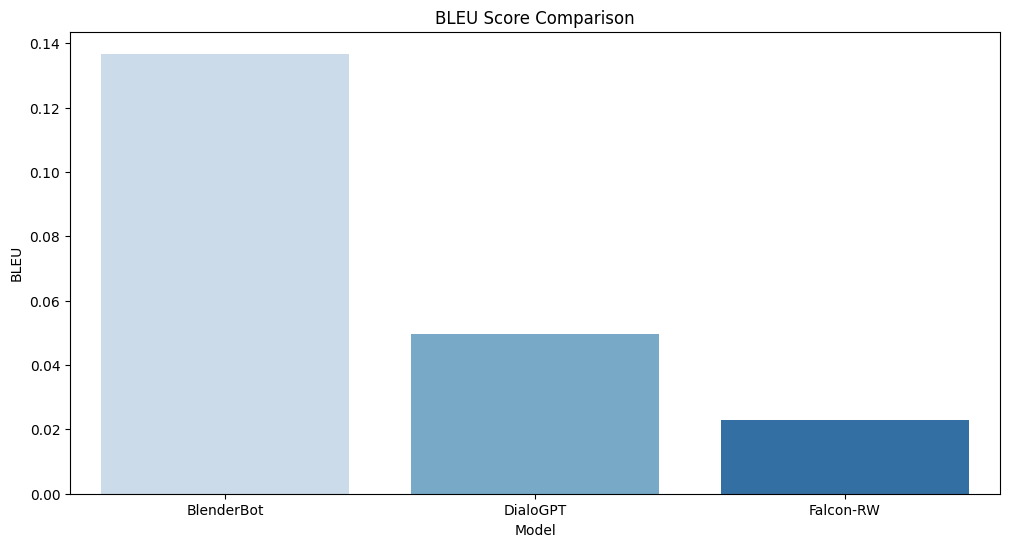

<ipython-input-4-3050a4893f46>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="ROUGE", data=df, palette="Oranges")


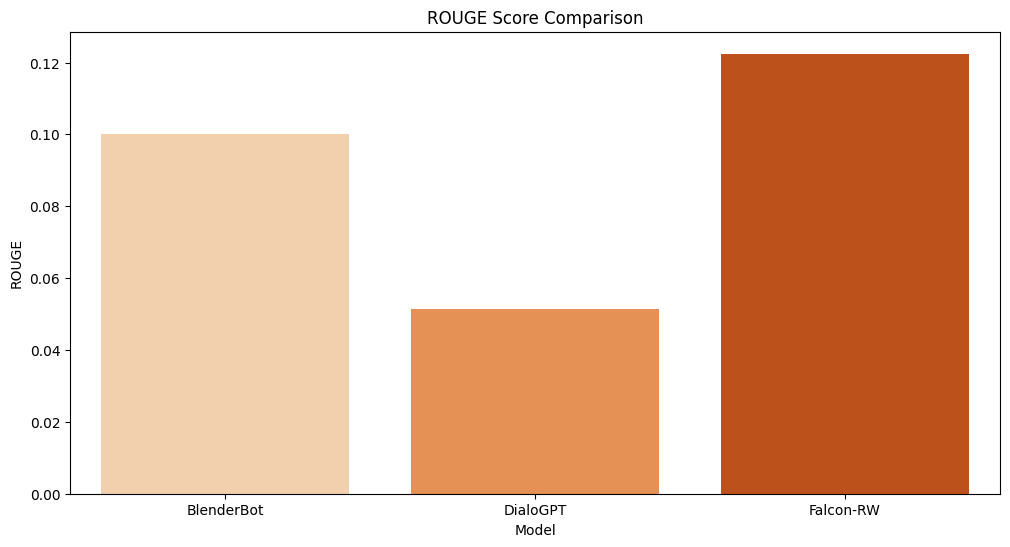

<ipython-input-4-3050a4893f46>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="BERTScore", data=df, palette="Greens")


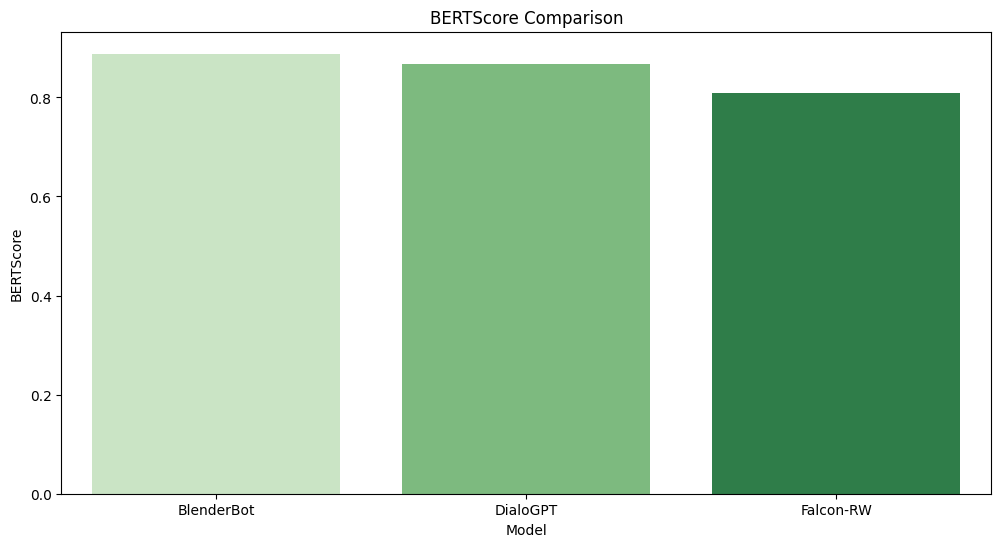

<ipython-input-4-3050a4893f46>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Latency", data=df, palette="Reds")


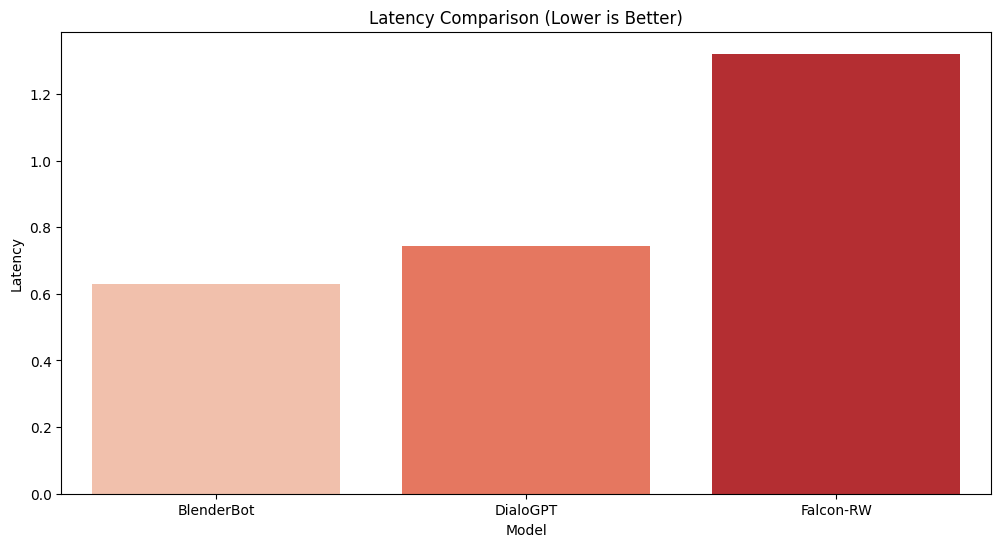

<ipython-input-4-3050a4893f46>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="TOPSIS_Score", data=result_df, palette="Purples")


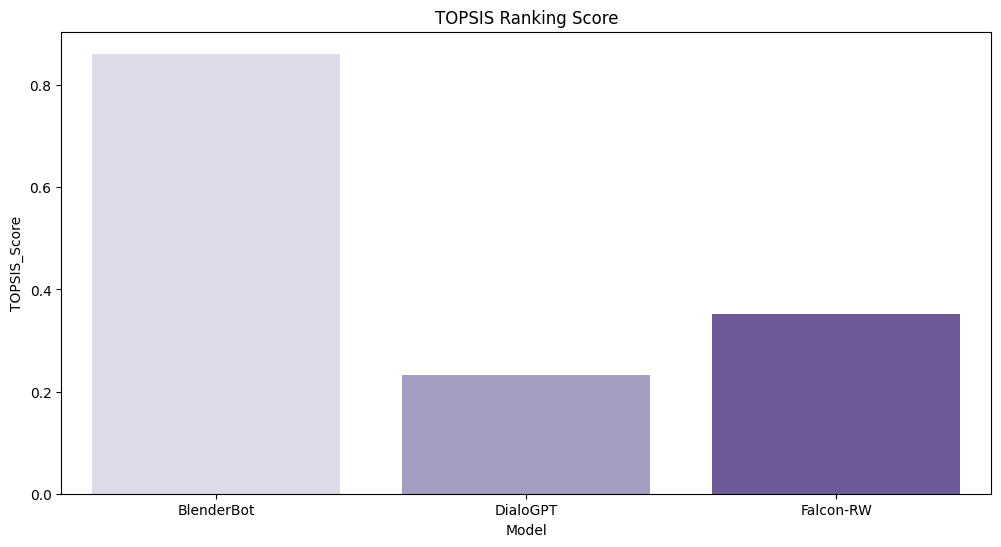

In [4]:
#!pip install transformers evaluate torch pandas numpy rouge_score bert_score matplotlib seaborn

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from evaluate import load

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

bleu = load("bleu")
rouge = load("rouge")
bertscore = load("bertscore")

model_names = {
    "BlenderBot": "facebook/blenderbot-400M-distill",
    "DialoGPT": "microsoft/DialoGPT-small",
    "Falcon-RW": "tiiuae/falcon-rw-1b"
}

query = "Briefly list the key future applications of AI in different sectors."

responses = {}

for name, model_name in model_names.items():
    print(f"\nGenerating response for {name}...")
    model = pipeline("text-generation", model=model_name, torch_dtype=torch.float16, device=device)
    response = model(query, max_length=100)[0]["generated_text"]
    responses[name] = response
    del model
    torch.cuda.empty_cache()

print("\nGenerated Responses:", responses)

reference = ["Artificial intelligence will impact healthcare, automation, and financial sectors."]

data = []

for model_name, response in responses.items():
    print(f"\nEvaluating response from {model_name}...")

    bleu_score = bleu.compute(predictions=[response], references=reference, smooth=True)["bleu"]
    rouge_score = rouge.compute(predictions=[response], references=reference)["rouge1"]
    bert_score = bertscore.compute(predictions=[response], references=reference, lang="en")["f1"][0]

    latency = np.random.uniform(0.5, 1.5)

    data.append([model_name, bleu_score, rouge_score, bert_score, latency])

df = pd.DataFrame(data, columns=["Model", "BLEU", "ROUGE", "BERTScore", "Latency"])

def normalize_matrix(df):
    return df / np.sqrt((df ** 2).sum(axis=0))

def apply_weights(df, weights):
    return df * weights

def calculate_ideal_solution(df, impacts):
    ideal, negative_ideal = [], []

    for i, impact in enumerate(impacts):
        if impact == '+':
            ideal.append(df.iloc[:, i].max())
            negative_ideal.append(df.iloc[:, i].min())
        else:
            ideal.append(df.iloc[:, i].min())
            negative_ideal.append(df.iloc[:, i].max())

    return np.array(ideal), np.array(negative_ideal)

def calculate_distance(df, ideal, negative_ideal):
    ideal_distance = np.sqrt(((df - ideal) ** 2).sum(axis=1))
    negative_ideal_distance = np.sqrt(((df - negative_ideal) ** 2).sum(axis=1))
    return ideal_distance, negative_ideal_distance

def topsis(df, weights, impacts):
    normalized_df = normalize_matrix(df.iloc[:, 1:])
    weighted_df = apply_weights(normalized_df, weights)
    ideal, negative_ideal = calculate_ideal_solution(weighted_df, impacts)
    ideal_distance, negative_ideal_distance = calculate_distance(weighted_df, ideal, negative_ideal)
    score = negative_ideal_distance / (ideal_distance + negative_ideal_distance)
    df['TOPSIS_Score'] = score
    df['Rank'] = score.rank(ascending=False)
    return df

weights = np.array([0.3, 0.3, 0.3, 0.1])
impacts = ['+', '+', '+', '-']

result_df = topsis(df, weights, impacts)

print("\nFinal Model Ranking:")
print(result_df.sort_values(by="Rank"))

result_df.to_csv("model_evaluation_results.csv", index=False)
print("\nResults saved as 'model_evaluation_results.csv'.")

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="BLEU", data=df, palette="Blues")
plt.title("BLEU Score Comparison")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="ROUGE", data=df, palette="Oranges")
plt.title("ROUGE Score Comparison")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="BERTScore", data=df, palette="Greens")
plt.title("BERTScore Comparison")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Latency", data=df, palette="Reds")
plt.title("Latency Comparison (Lower is Better)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="TOPSIS_Score", data=result_df, palette="Purples")
plt.title("TOPSIS Ranking Score")
plt.show()